## house pricing predict

In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,ISTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.tail()

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,ISTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIME    506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  ISTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [7]:
housing['MEDV'].value_counts()

MEDV
50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: count, Length: 229, dtype: int64

In [8]:
housing.describe()

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,ISTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286054,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705818,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt
#housing.hist(bins=50,figsize=(20,15))# historical plot

## TRAIN AND TEST SPLITING

In [11]:
#for learning purpose
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)# fixed first 42 value every time when generated random value only change after 42 values
    shuffled=np.random.permutation(len(data))
    print(shuffled)
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [12]:
# train_set,test_set=split_train_test(housing,0.2)

In [13]:
# print(f"rows in train set :{len(train_set)} \n rows in test set :{len(test_set)} \n ")

In [14]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"rows in train set :{len(train_set)} \n rows in test set :{len(test_set)} \n ")

rows in train set :404 
 rows in test set :102 
 


## FOR EQUAL DITRIBUTION OF CHAS IN 0 OR 1

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]


In [16]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [17]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [18]:
#95/7 equal distribution of 1 or 0 in test set

In [19]:
#376/28 equal distribution of 1 or 0 in train set

In [20]:
housing=strat_train_set.copy()

## looking for correlation

In [21]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679826
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIME     -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
ISTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot: xlabel='RM', ylabel='RM'>,
        <AxesSubplot: xlabel='ZN', ylabel='RM'>,
        <AxesSubplot: xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot: xlabel='ISTAT', ylabel='RM'>],
       [<AxesSubplot: xlabel='RM', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot: xlabel='ISTAT', ylabel='ZN'>],
       [<AxesSubplot: xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot: xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot: xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot: xlabel='ISTAT', ylabel='MEDV'>],
       [<AxesSubplot: xlabel='RM', ylabel='ISTAT'>,
        <AxesSubplot: xlabel='ZN', ylabel='ISTAT'>,
        <AxesSubplot: xlabel='MEDV', ylabel='ISTAT'>,
        <AxesSubplot: xlabel='ISTAT', ylabel='ISTAT'>]], dtype=object)

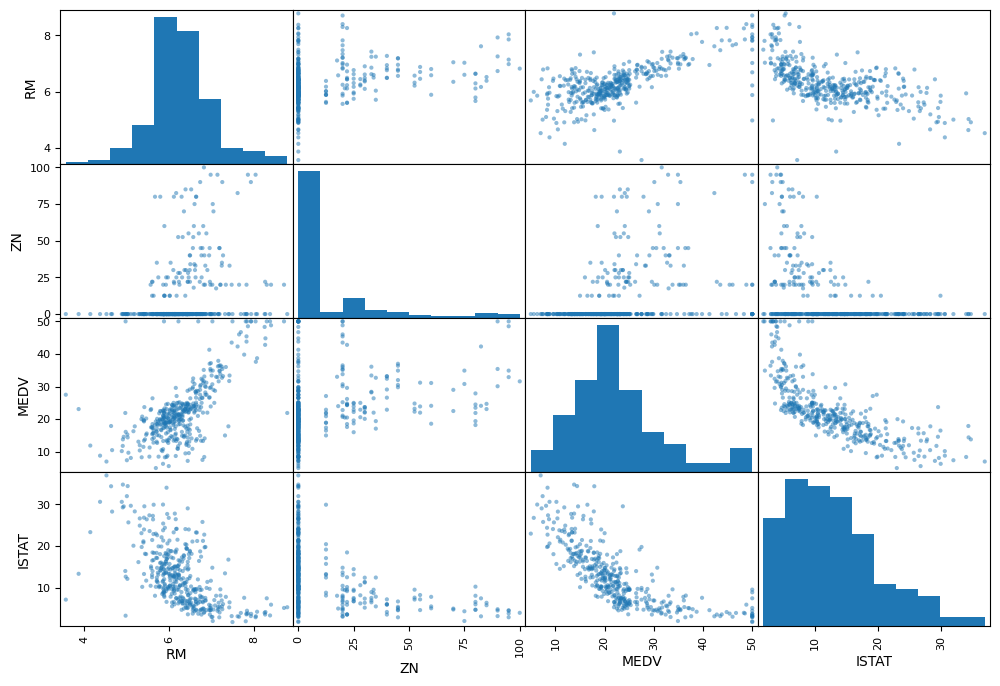

In [22]:
from pandas.plotting import scatter_matrix
attributes=['RM','ZN','MEDV','ISTAT']
scatter_matrix(housing[attributes],figsize=(12,8))

<AxesSubplot: xlabel='RM', ylabel='MEDV'>

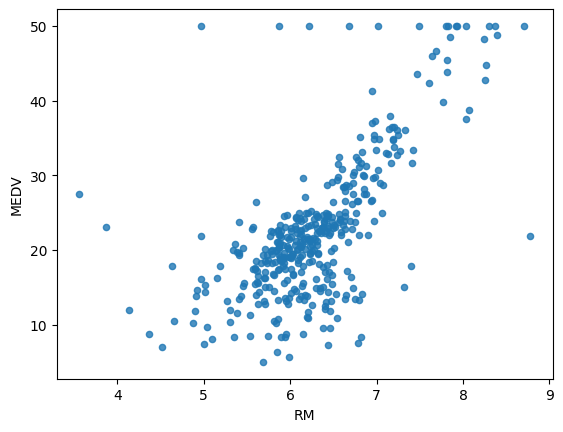

In [23]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

## as tried out attribute combination

In [24]:
housing["TAXPRM"]=housing['TAX']/housing['RM']

In [25]:
housing['TAXPRM'].head()
housing.head()

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,ISTAT,MEDV,TAXPRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [26]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679826
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIME     -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXPRM    -0.526898
ISTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot: xlabel='TAXPRM', ylabel='MEDV'>

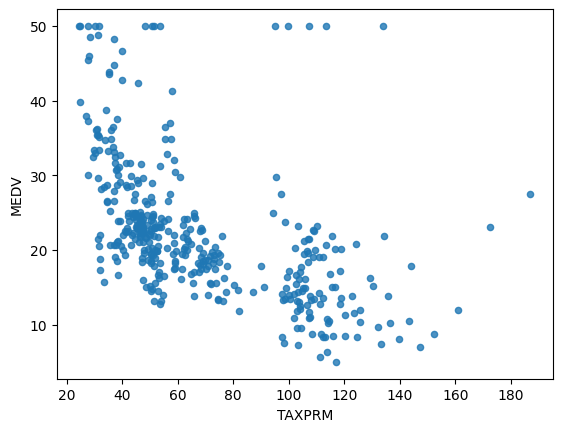

In [27]:
housing.plot(kind="scatter",x="TAXPRM",y="MEDV",alpha=0.8)

In [28]:
housing=strat_train_set.drop('MEDV',axis=1)
housing_labels=strat_train_set['MEDV'].copy()

## missing attribute in room by my logic

In [29]:
# to take care of missing attribute, you have three option:
#     1> get read the missing datapoint
#     2>gate read the whole data attribute
#     3>set the value of some value (zero,mean or meadiun)

In [30]:
a=housing.dropna(subset=["RM"])  #     1> get read the missing datapoint
a.shape
# note that there are no room (rm) colume also note that original housing dataframe there are unchange

(401, 13)

In [31]:
#     2>gate read the whole data attribute
housing.drop("RM",axis=1).shape
# note that there are no room (rm) colume also note that original housing dataframe there are unchange

(404, 12)

In [32]:
#     3>set the value of some value (zero,mean or meadiun)
median=housing['RM'].median()
# note that there are no room (rm) colume also note that original housing dataframe there are unchange
median

6.216

In [33]:
housing['RM'].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [34]:
housing.shape

(404, 13)

In [35]:
housing.describe()  #before transfrom housing dataframe

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,ISTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281596,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715349,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.216000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.631000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## missing value fill by using sklearn methos

In [36]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [37]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21600e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [38]:
X=imputer.transform(housing)

In [39]:
housing_tr=pd.DataFrame(X,columns=housing.columns)

In [40]:
housing_tr.describe()

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,ISTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281109,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712703,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.216000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## scikit-learn Design

Primarily, three types of objects
1. Estimators It estimates some parameter based on a dataset.
Eg. imputer. It has a fit method and transform method.
Fit method Fits the dataset and calculates internal parameters

2. Transformers transform method takes input and returns output based on the learningsfrom fit().
It also has a convenience function called fit_transform() which fits and then transforms.
3. Predictors Linear Regression model is an example of predictor.
fit() and - predict() are two common functions. It also gives score() function which will evaluate the predictions.

## features scalling

Primarily, two types of feature scaling methods:
1. Min-max scaling (Normalization)
   (value min)/(max - min)
   Sklearn provides a class called MinMaxScaler for this

2. Standardization
    (value mean)/std
    Sklearn provides a class called StandardScaler for this

## creating pipeling

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    #....... as many pipeline you create as your choice
    ('std_scaller',StandardScaler())
])

In [42]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [43]:
housing_num_tr.shape

(404, 13)

## selecting a desired model for price predict 

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model=LinearRegression()
# model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

## test prediction by ramdon value

In [45]:
some_data=housing.iloc[:5]

In [46]:
some_labels=housing_labels.iloc[:5]

In [47]:
prepared_data=my_pipeline.transform(some_data)

In [48]:
model.predict(prepared_data)

array([22.334, 25.312, 16.847, 23.295, 23.455])

In [49]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## evaluating the error in model

In [50]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)

In [51]:
rmse
# for heavy error this linearreggresion method will be discard
# using decision tree method data will be overfeed thts why its not use it has heavy error in future

1.206601084956341

## using better evaluation technique -cross validation

In [52]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring='neg_mean_squared_error',cv=10)
rmse_score=np.sqrt(-scores)

In [53]:
rmse_score

array([2.82230741, 2.6778793 , 4.56496094, 2.50066088, 3.41480721,
       2.54370049, 4.48339821, 3.36918958, 3.51991485, 3.22646225])

In [54]:
def print_scores(scores):
    print("scores :",scores)
    print("mean:",scores.mean())
    print("standard deviation:",scores.std())

In [55]:
print_scores(rmse_score)

scores : [2.82230741 2.6778793  4.56496094 2.50066088 3.41480721 2.54370049
 4.48339821 3.36918958 3.51991485 3.22646225]
mean: 3.3123281110062557
standard deviation: 0.6997808409370795


## HOW TO SAVE FILE USING JOBLIB

In [56]:
from joblib import dump,load
dump(model,'housing.joblib')

['housing.joblib']

## TESTING THE MODEL ON TEST DATA

In [57]:
x_test=strat_test_set.drop('MEDV',axis=1)
y_test=strat_test_set['MEDV'].copy()
x_test_prepared=my_pipeline.transform(x_test)
final_prediction=model.predict(x_test_prepared)
final_mse=mean_squared_error(y_test,final_prediction)
final_rmse=np.sqrt(final_mse)
print(final_prediction,list(y_test))

[24.341 11.874 25.052 21.782 18.033 14.984 19.652 14.367 31.866 41.544
 19.613 12.101 23.172 28.696 19.57  11.196 31.712 14.403 23.59  18.699
 19.954 17.473 18.444 22.251 18.21  31.81  16.302 33.594  8.876 33.729
 24.037 21.451 22.847 11.322 20.507 11.199 43.35  24.526 22.958 42.738
 23.756 29.427 20.225 20.68  18.757 33.535 44.068 19.91  20.544 21.479
 21.212 14.559 20.855 14.933 25.083 32.849 41.448 28.932 19.428 20.918
 47.099  9.856 18.684 25.194 14.726 32.988 19.381 18.121 19.134 34.325
 25.252 22.784 21.619 22.377 34.898 12.818 15.867 20.33  20.643 21.625
 22.874 20.952 13.646 23.016 20.589 21.047 14.19  21.008 21.575 23.294
 19.035 27.092  7.49  26.507 18.949 29.791 20.039 31.173 14.203 27.04
 21.391 20.171] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

In [58]:
final_rmse

2.9813862119990486

In [59]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24319172, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## using the model

In [60]:
from joblib import dump,load
import numpy as np
model=load('housing.joblib')
features=np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24319172, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([22.334])